<a href="https://colab.research.google.com/github/keremshns/tensorflow_developer/blob/main/mnist_handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [36]:
#LOAD/SPLIT/INSPECT DATA
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

num_train_images = len(x_train)
img_shape = x_train[0].shape
labels_shape = y_train.shape

print("There are ", num_train_images, "images.")
print("Shape of an image: ",img_shape)
print("There are ", num_train_images, "labels.",labels_shape)

There are  60000 images.
Shape of an image:  (28, 28)
There are  60000 labels. (60000,)


In [37]:
#FUNCTION FOR NORMALIZATION
def normalizer(x_train, y_train, x_test, y_test):
  x_train = x_train/255.0
  x_test = x_test/255.0

  return (x_train, y_train), (x_test,y_test)


#FUNCTION FOR INSTANTIATING DATA GENERATOR OBJECTS
def create_generators(x_train, y_train, x_test, y_test):

  train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                           rotation_range=15,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                            shear_range=0.2,
                                                           zoom_range=0.1)

  val_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                          rotation_range=15,
                                                         width_shift_range=0.2,
                                                          height_shift_range=0.2,
                                                          shear_range=0.2,
                                                         zoom_range=0.1)
  return train_generator, val_generator





In [38]:
#RUN WHEN USING IMAGE DATA GENERATOR
#OBTAINING AUGMENTED DATA
train_generator, val_generator = create_generators(x_train, y_train, x_test, y_test)

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

train_generator = train_generator.flow(x_train,
                                       y_train,
                                       batch_size=128
                                       )

val_generator = val_generator.flow(x_test,
                                   y_test,
                                   batch_size=128,
                                   )


In [5]:
#RUN WHEN USING NORMALIZER
#JUST FOR PREPROCESSING THE DATA IF YOU DONT WANT TO USE IMAGE GENERATOR
(x_train, y_train), (x_test, y_test) = normalizer(x_train, y_train, x_test, y_test)

In [39]:
#HYPERPARAMETERS
epochs = 50

In [29]:
model = tf.keras.Sequential([

        tf.keras.layers.Conv2D(64, (2,2), input_shape=(28,28,1), padding="same"),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(32, (2,2), padding="same"),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(16, (2,2), padding="same"),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.GlobalMaxPool2D(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),

])

model.summary()

callback = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10**(epochs/10))

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

history = model.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=[callback])



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 7, 7, 16)          2064      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 3, 3, 16)        

Epoch 1/50


KeyboardInterrupt: ignored

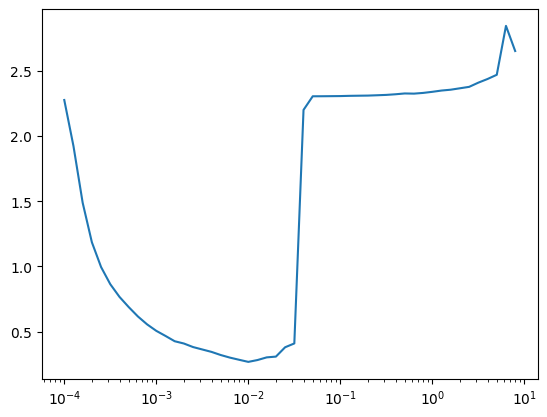

In [ ]:
lr = history.history["lr"]
loss = history.history["loss"]
accuracy = history.history["accuracy"]

plt.semilogx(lr,loss)

In [ ]:
model = tf.keras.Sequential([

        tf.keras.layers.Conv2D(64, (5,5), input_shape=(28,28,1), padding="same"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (5,5), padding="same"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(16, (5,5), padding="same"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.GlobalMaxPooling2D(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),

])

model.summary()


optimizer = tf.keras.optimizers.Adam(lr=8e-3)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)



Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 14, 14, 32)        51232     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 7, 7, 16)          12816     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 3, 3, 16)       

Epoch 1/50
469/469 [==============================] - 32s 62ms/step - loss: 0.5699 - accuracy: 0.8162 - val_loss: 0.1833 - val_accuracy: 0.9446
Epoch 2/50
469/469 [==============================] - 28s 60ms/step - loss: 0.1810 - accuracy: 0.9463 - val_loss: 0.1378 - val_accuracy: 0.9590
Epoch 3/50
469/469 [==============================] - 30s 64ms/step - loss: 0.1360 - accuracy: 0.9587 - val_loss: 0.1161 - val_accuracy: 0.9641
Epoch 4/50
469/469 [==============================] - 29s 61ms/step - loss: 0.1075 - accuracy: 0.9686 - val_loss: 0.0935 - val_accuracy: 0.9707
Epoch 5/50
469/469 [==============================] - 28s 60ms/step - loss: 0.0978 - accuracy: 0.9697 - val_loss: 0.0730 - val_accuracy: 0.9772
Epoch 6/50
426/469 [==========================>...] - ETA: 2s - loss: 0.0855 - accuracy: 0.9734

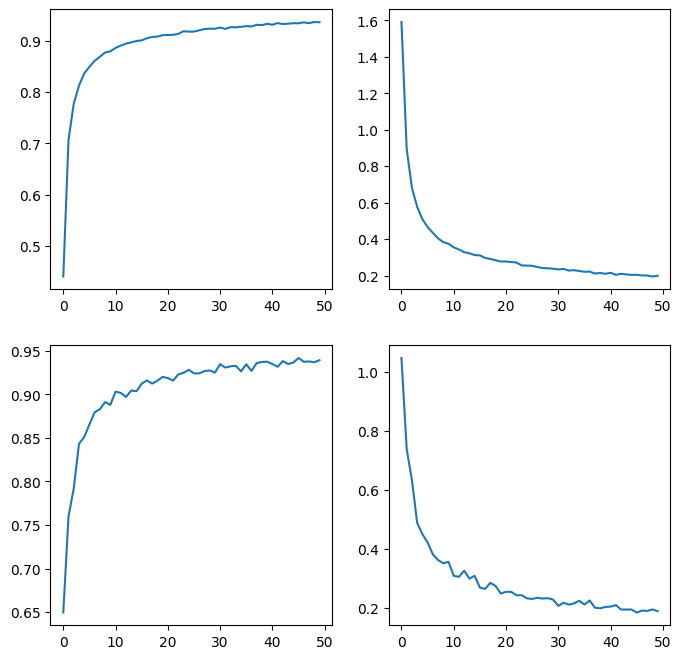

In [14]:
accuracy = history.history["accuracy"]
loss = history.history["loss"]
val_accuracy = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.plot(range(epochs),accuracy)
plt.subplot(2,2,2)
plt.plot(range(epochs),loss)
plt.subplot(2,2,3)
plt.plot(range(epochs),val_accuracy)
plt.subplot(2,2,4)
plt.plot(range(epochs),val_loss)


plt.show()
